# 방범용 CCTV 위치와 인구 데이터분석

- https://data.busan.go.kr/
- 파일데이터 "부산광역시_방범용 CCTV 정보_20230622.CSV " 다운로드
- 목표 : CCTV 수와 인구대비 CCTV 비율을 파악
- 최종 : 인구대비 CCTV의 평균치 확인 및 CCTV가 부족한 구를 확인

In [1]:
import pandas as pd
file_path = "./ref/부산방범용CCTV 정보.csv"
cctv = pd.read_csv(file_path, encoding="EUC-KR")
# cctv.head()
# cctv.tail()
cctv.sample(3)

,CCTV 명칭,CCTV 좌표,CCTV 그룹
5771,(13차)_중동296-3_탑마트주차장_삼거리_고2,"10.1.11.221:0:0:0:0:0:0,10.1.11.221:9400:",해운대-13차
1375,(8차)_0194_문현1동_아이세상어린이집,"10.1.10.44:0:0:0:0:0:0,10.1.10.44:9400:",남구-8차
2254,(11차)_화명동_1170-12_화명일신기독병원_회전,"10.1.11.204:0:0:0:0:0:0,10.1.11.204:9400:",북구-11차


In [2]:
# cctv.columns = ["x","xx","local"]
cctv = cctv.rename(columns={"CCTV 그룹":"local"})['local']

In [3]:
# 방법1: apply 함수를 사용하여 'local' 열의 값을 '-'로 나눈 후 첫 번째 부분만 남김
cctv = cctv.apply(lambda x: x.split("-")[0])

# 방법2: for 루프를 사용하여 'local' 열의 각 값을 '-'로 나누고, 첫 번째 부분으로 새로운 리스트를 생성
# local_list = []
# for v in cctv:
#     local_list.append(v.split("-")[0])
# 리스트를 다시 Series로 변환
# cctv = pd.Series(local_list)

# 방법3: 정규 표현식을 사용하여 'local' 열의 '-' 앞 부분만 추출
# cctv = cctv.str.extract(r"(\D+)-")[0]

# 'local' 열에서 각 고유 값의 발생 횟수를 계산
cctv = cctv.value_counts()
cctv = cctv.reset_index()

In [4]:
cctv.sample(3)

,local,count
3,동래,404
1,사상,422
0,사하,431


- 연령별(행정동)인구현황
- https://jumin.mois.go.kr/ageStatMonth.do
<br>
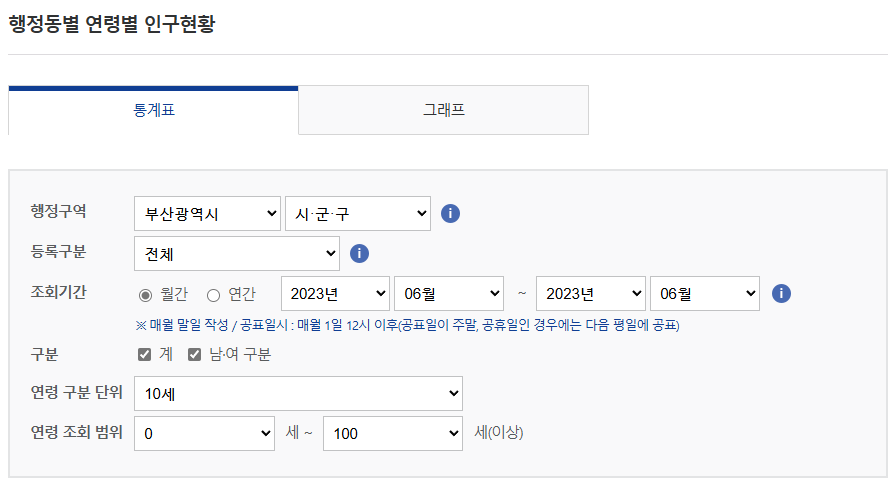

In [5]:
import pandas as pd
import warnings
warnings.simplefilter("ignore",UserWarning)  # UserWarning 경고를 무시하도록 설정

file_path2 = "./ref/연령별인구현황_202306.xlsx"
ori = pd.read_excel(file_path2,sheet_name="연령별인구현황",skiprows=3)
# ori.head()
# ori.tail()
ori.sample(3)
# ori

,행정기관코드,행정기관,총 인구수,연령구간인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,...,10~19세.2,20~29세.2,30~39세.2,40~49세.2,50~59세.2,60~69세.2,70~79세.2,80~89세.2,90~99세.2,100세 이상.2
16,2671000000,부산광역시 기장군,"179,384","179,384","16,388","18,868","16,617","22,793","33,585","26,304",...,"9,124","7,787","11,349","16,540","12,787","12,626","7,608","3,958",703,28
5,2623000000,부산광역시 부산진구,"357,475","357,475","19,405","24,054","49,960","49,256","49,715","55,808",...,"11,921","26,314","24,077","24,451","28,682","31,317","18,484","9,708","1,324",31
3,2617000000,부산광역시 동구,"86,809","86,809","3,903","4,636","9,480","10,598","11,324","13,941",...,"2,254","4,847","4,991","5,212","6,703","8,376","6,120","3,566",494,10


In [6]:
data = ori[['행정기관','총 인구수']]  # '행정기관'과 '총 인구수' 열만 선택하여 새로운 DataFrame 생성
data.columns = ['local','population']  # 열 이름을 'local'과 'population'으로 변경
data = data.loc[1:]  # 첫 번째 행을 제외한 모든 행 선택 (첫 번째 행은 제목 행이기 때문에 제외)
data['local'] = data['local'].apply(lambda x: x.replace("부산광역시 ","").strip())  # 'local' 열의 각 값에서 '부산광역시 ' 부분을 제거
data = data.reset_index(drop=True)  # drop=True는 기존 인덱스를 삭제하고 새롭게 부여
data

,local,population
0,중구,"39,311"
1,서구,"104,449"
2,동구,"86,809"
3,영도구,"107,006"
4,부산진구,"357,475"
5,동래구,"272,590"
6,남구,"255,786"
7,북구,"276,684"
8,해운대구,"383,355"
9,사하구,"300,922"


In [7]:
# cctv = cctv.sort_values(by="local", ascending=True)
# data = data.sort_values(by="local", ascending=True)

# 방법 1
# total.columns = ['local','count','localx','population']
# total = total.drop(columns=['localx'])
# total = pd.concat([cctv,data],axis=1)

# 방법 2
# total = total.drop(total.columns[2],axis=1) # 이름이 같을경우 인덱스가 사용안됨.
# total

In [8]:
# 공백조심! data['local'] = data['local'].apply(lambda x: len(x))
data['local'] = data['local'].apply(lambda x: x.replace("구","").replace("군","").replace("부산진","진구").strip() if len(x.strip())>2 else x.strip())

In [9]:
total = pd.merge(cctv,data, on='local')
total['population'] = total['population'].str.replace(",","").astype(int)
total = total.sort_values(by='population', ascending=False)
total = total.set_index('local')  # 중요함
total

,count,population
local,,
해운대,418,383355
진구,395,357475
사하,431,300922
북구,403,276684
동래,404,272590
남구,351,255786
금정,403,218711
사상,422,203029
연제,377,202919


Text(0.2, 0.4, '한글')

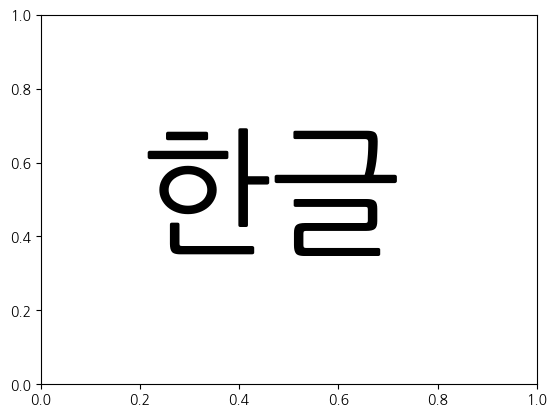

In [10]:
# OS에 사용가능한 , 설치된 폰트를 나열
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm

# 리눅스용 폰트 경로 설정
plt.rc('font', family="NanumGothic")
plt.text(0.2,0.4,'한글',size=100)

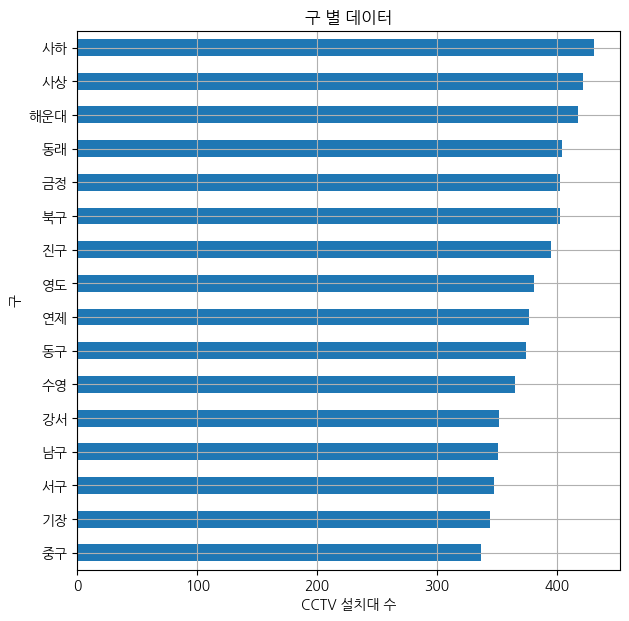

In [11]:
plt.figure()
total['count'].sort_values().plot(x='local',y='count',kind='barh',grid=True,figsize=(7,7),xlabel='CCTV 설치대 수',ylabel='구')

plt.title('구 별 데이터')
# plt.xlabel('CCTV 설치대 수')
# plt.ylabel('구')
plt.show()

[]

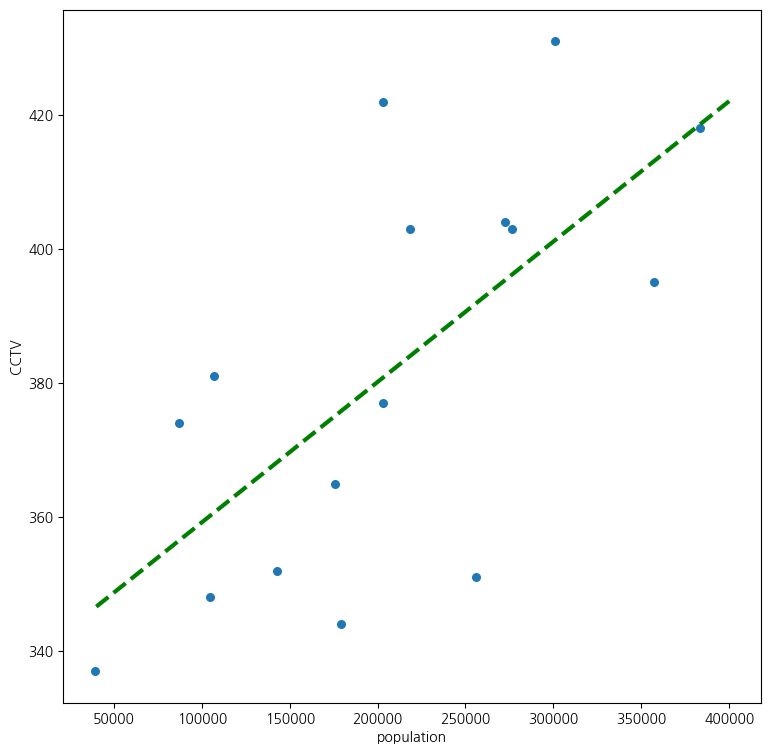

In [12]:
import numpy as np
import matplotlib.pyplot as plt

fp1 = np.polyfit(total['population'], total['count'], 1)  # 1차 다항 회귀 분석을 수행하여 계수 추정
f1 = np.poly1d(fp1)  # 1차 다항식 생성
fx = np.linspace(40000, 400000, 10)  # x값의 범위를 지정하여 fx 생성
plt.figure(figsize=(9,9))  # 그래프 크기 설정
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')  # 회귀선 플롯
plt.scatter(total['population'], total['count'], s=30)#   산점도 생성 (scatter)

plt.xlabel('population')  # x축 라벨 설정
plt.ylabel('CCTV')  # y축 라벨 설정

plt.plot()  # 그래프 출력

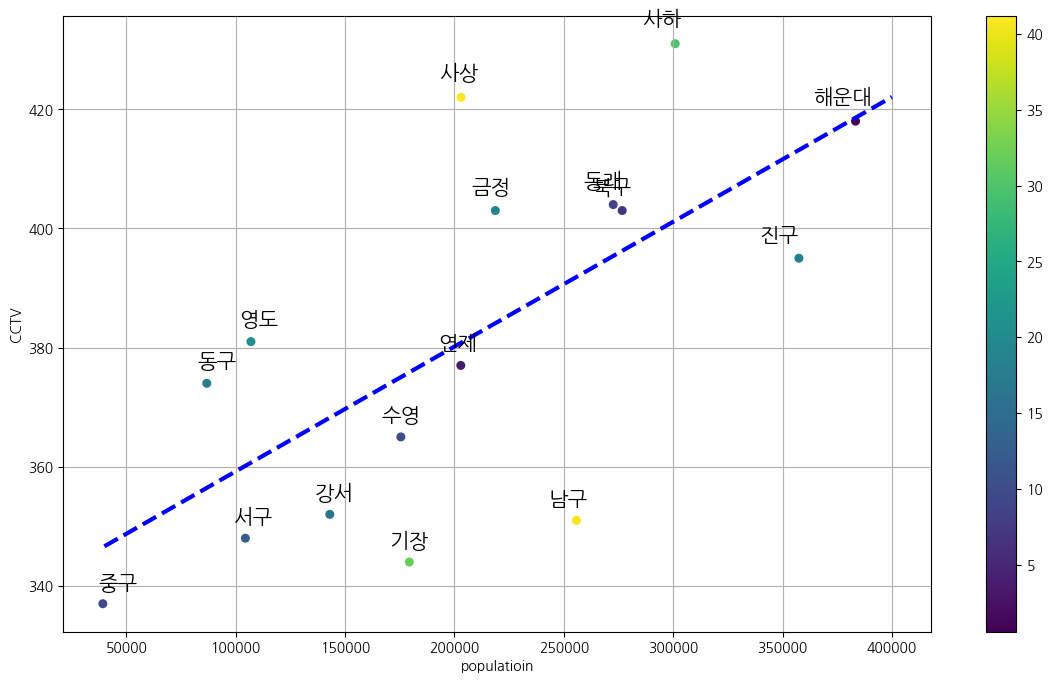

In [13]:
import numpy as np
fp1 = np.polyfit(total['population'],total['count'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(40000,400000,10)
plt.figure(figsize=(14,8))
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='b')

# 오차
total['err'] = np.abs(total['count'] - f1(total['population']))

plt.scatter(total['population'], total['count'], s= 30, c = total['err'])
plt.xlabel('populatioin')
plt.ylabel('CCTV')
plt.plot()

# 점마다 각 동의 이름을 부여
for i in range(len(total['population'])):
    plt.text(total['population'].iloc[i]*0.95, total['count'].iloc[i]*1.007, total.index[i], fontsize=15)
plt.grid()
plt.colorbar()
plt.show()    

- 서울 CCTV 정보
- https://www.localdata.go.kr/lif/lifeCtacDataView.do

In [14]:
import pandas as pd
import warnings
warnings.simplefilter("ignore",UserWarning)  # UserWarning 경고를 무시하도록 설정

file_path3 = "./ref/서울CCTV정보.xlsx"
ori1 = pd.read_excel(file_path3)
# ori1.head()
# ori1.tail()
ori1.sample(3)
# ori1

,번호,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치연월,관리기관전화번호,WGS84위도,WGS84경도,데이터기준일자
8365,8366,서울특별시 용산구청,서울특별시 용산구 우사단로2가길 39-2,서울특별시 용산구 보광동 265-70 골목 내 삼거리,생활방범,3,300,NaN,30,2010-08,02-2199-6664,37.530360,127.001000,2023-12-06
9505,9506,서울특별시 마포구청,서울특별시 월드컵로 34길 13,서울특별시 성산동 590-5,교통단속,1,200,360도전방면,30,2020-12,02-3153-8434,37.565437,126.903528,2023-12-26
2834,2835,서울특별시 은평구청,서울특별시 은평구 불광로 119,서울특별시 은평구 불광1동 222-1,생활방범,4,200,360도 전방,30,2022-06,02-351-6393,37.617415,126.933062,2023-03-06


In [15]:
cctv_s = ori1[['관리기관명','카메라대수']]  # '행정기관'과 '총 인구수' 열만 선택하여 새로운 DataFrame 생성
cctv_s.columns = ['local_s','count_s']  # 열 이름을 'local'과 'population'으로 변경
cctv_s.loc[:,'local_s'] = cctv_s['local_s'].apply(lambda x: x.replace("서울특별시 ","").replace("청","").strip())  # 'local' 열의 각 값에서 '부산광역시 ' 부분을 제거
cctv_s = cctv_s.reset_index(drop=True)  # drop=True는 기존 인덱스를 삭제하고 새롭게 부여
cctv_s.sample(3)

,local_s,count_s
1504,양천구,2
2035,양천구,1
6735,성북구,1


In [16]:
cctv_s = cctv_s.groupby('local_s')['count_s'].sum().reset_index()
cctv_s.sample(2)

,local_s,count_s
0,마포구,3155
4,용산구,3185


- 서울 인구현황
- https://jumin.mois.go.kr/ageStatMonth.do#none

In [17]:
import pandas as pd
import warnings
warnings.simplefilter("ignore", UserWarning)

file_path4 = "./ref/서울인구현황.xlsx"
ori3 = pd.read_excel(file_path4,sheet_name="연령별인구현황",skiprows=3)
ori3.sample(2)

,행정기관코드,행정기관,총 인구수,연령구간인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,...,10~19세.2,20~29세.2,30~39세.2,40~49세.2,50~59세.2,60~69세.2,70~79세.2,80~89세.2,90~99세.2,100세 이상.2
14,1144000000,서울특별시 마포구,"365,111","365,111","21,267","27,099","59,651","63,476","57,678","55,578",...,"13,539","33,343","33,544","29,806","28,471","22,420","13,655","7,847","1,225",46
8,1129000000,서울특별시 성북구,"429,142","429,142","25,023","36,022","65,284","56,844","64,772","70,597",...,"17,839","34,365","28,361","32,992","35,760","30,809","18,752","10,356","1,591",46


In [18]:
sdata = ori3[['행정기관','총 인구수']]
sdata.columns = ["local_s","population_s"]
sdata = sdata.loc[1:]
sdata['local_s'] = sdata['local_s'].apply(lambda x: x.replace("서울특별시 ","").strip())
sdata = sdata.reset_index(drop=True) # drop = True는 기존 인덱스를 삭제하고 새롭게 부여
sdata.head()

,local_s,population_s
0,종로구,"140,397"
1,중구,"121,441"
2,용산구,"217,288"
3,성동구,"279,374"
4,광진구,"336,169"


In [19]:
total_s = pd.merge(cctv_s, sdata, on='local_s')

total_s

,local_s,count_s,population_s
0,마포구,3155,"365,111"
1,성동구,3921,"279,374"
2,성북구,4460,"429,142"
3,양천구,11010,"438,353"
4,용산구,3185,"217,288"
5,은평구,4851,"463,298"


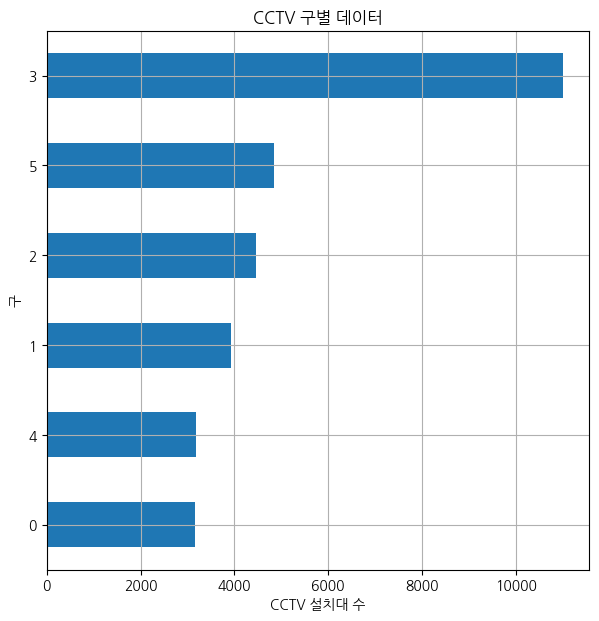

In [20]:
# plt.figure()
total_s['count_s'].sort_values().plot(x='local_s',y='count_s', kind="barh",grid=True,figsize=(7,7), ylabel="구")

plt.title("CCTV 구별 데이터")
plt.xlabel("CCTV 설치대 수")
plt.show()

[]

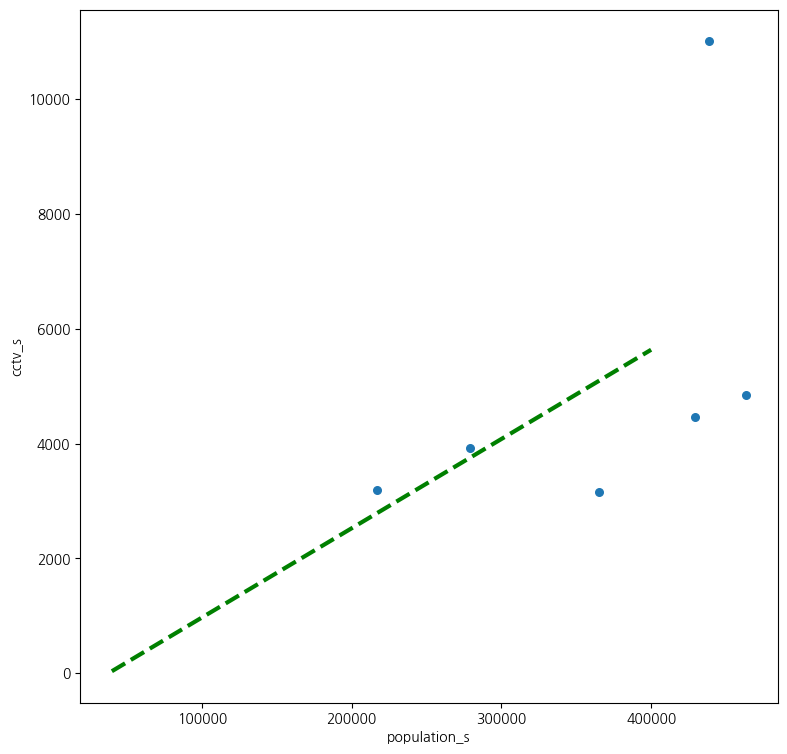

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# 'population_s' 열에서 쉼표 제거하고 숫자형으로 변환
total_s['population_s'] = total_s['population_s'].str.replace(",", "").astype(float)

# 'count_s' 열을 숫자형으로 변환
total_s['count_s'] = total_s['count_s'].astype(float)

# 1차 다항 회귀 분석을 수행하여 계수 추정
fp2 = np.polyfit(total_s['population_s'], total_s['count_s'], 1)

# 1차 다항식 생성
f2 = np.poly1d(fp2)

# x값의 범위를 지정하여 fx 생성
fx2 = np.linspace(40000, 400000, 10)

# 그래프 크기 설정
plt.figure(figsize=(9,9))

# 회귀선 플롯
plt.plot(fx2, f2(fx2), ls='dashed', lw=3, color='g')

# 산점도 생성 (scatter)
plt.scatter(total_s['population_s'], total_s['count_s'], s= 30)

# x축 라벨 설정
plt.xlabel('population_s')

# y축 라벨 설정
plt.ylabel('cctv_s')

# 그래프 출력
plt.plot()

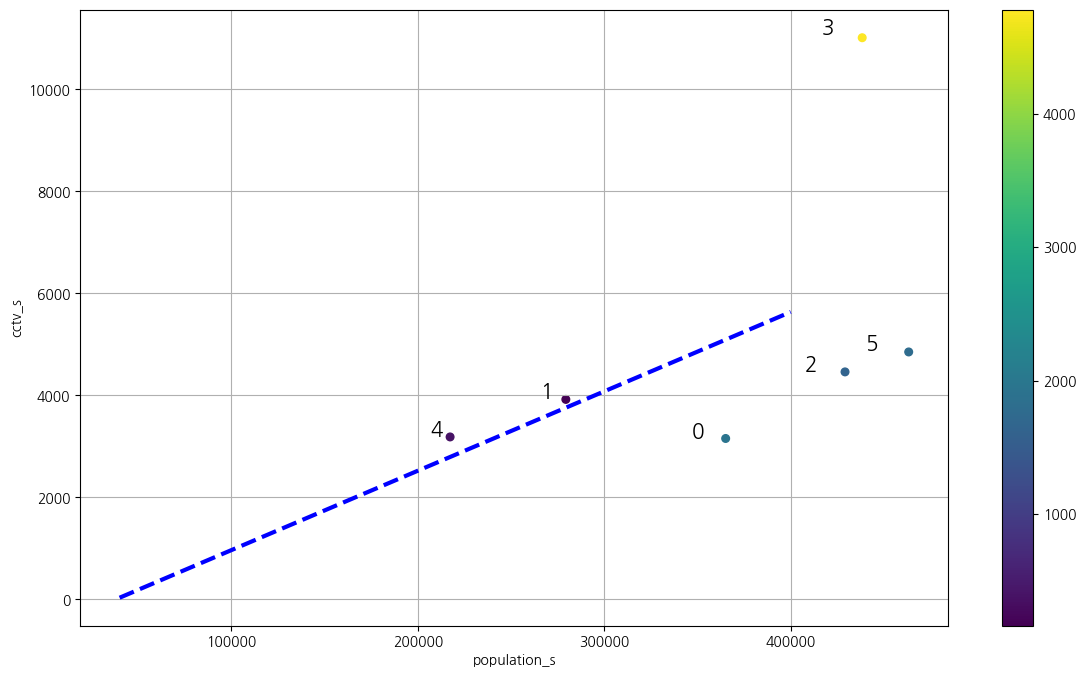

In [26]:
import numpy as np
fp2 = np.polyfit(total_s['population_s'],total_s['count_s'], 1)
f2 = np.poly1d(fp2)
fx2 = np.linspace(40000,400000,10)
plt.figure(figsize=(14,8))
plt.plot(fx2,f2(fx2), ls='dashed', lw=3, color='b')

# 오차
total_s['err'] = np.abs(total_s['count_s'] - f2(total_s['population_s']))

plt.scatter(total_s['population_s'], total_s['count_s'], s= 30, c = total_s['err'])
plt.xlabel('population_s')
plt.ylabel('cctv_s')
plt.plot()

# 점마다 각 동의 이름을 부여
for i in range(len(total_s['population_s'])):
    plt.text(total_s['population_s'].iloc[i]*0.95, total_s['count_s'].iloc[i]*1.007, total_s.index[i], fontsize=15)
plt.grid()
plt.colorbar()
plt.show()    

- 서울범죄발생현환
- https://data.seoul.go.kr/dataList/316/S/2/datasetView.do